# P1 SouthGermanCredit

Este cuaderno carga el dataset `SouthGermanCredit.asc` e importa NumPy, Pandas y Matplotlib.


In [149]:
# Imports
import sys
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Ajustes de display opcionales
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)

# Resolver ruta del dataset de forma robusta
CANDIDATES = [
    Path('/home/camilo-arch/machine-learning/introduccion/notebooks/data/SouthGermanCredit.asc'),
    Path('data/SouthGermanCredit.asc'),
    Path('introduccion/notebooks/data/SouthGermanCredit.asc'),
    Path('../notebooks/data/SouthGermanCredit.asc'),
]
DATA_PATH = next((p for p in CANDIDATES if p.exists()), None)
print("CWD:", Path().resolve())
print("Probando rutas:", [str(p) for p in CANDIDATES])
assert DATA_PATH is not None, (
    "No se encontró el archivo SouthGermanCredit.asc en ninguna de las rutas candidatas"
)
print(f"Usando dataset en: {DATA_PATH.resolve()}")


CWD: /app/notebooks
Probando rutas: ['/home/camilo-arch/machine-learning/introduccion/notebooks/data/SouthGermanCredit.asc', 'data/SouthGermanCredit.asc', 'introduccion/notebooks/data/SouthGermanCredit.asc', '../notebooks/data/SouthGermanCredit.asc']
Usando dataset en: /app/notebooks/data/SouthGermanCredit.asc


In [150]:
# Carga de datos
# El archivo es texto con separadores por espacios y una fila de encabezados
columns_preview = None
try:
    df = pd.read_csv(DATA_PATH, sep=r"\s+", engine="python")
    columns_preview = df.columns.tolist()
    print(f"Filas: {len(df):,} | Columnas: {df.shape[1]}")
    print("Columnas:", columns_preview)
except Exception as exc:
    print("Error al leer el archivo:", exc)

# Vista rápida
df.head()


Filas: 1,000 | Columnas: 21
Columnas: ['laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont', 'beszeit', 'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter', 'weitkred', 'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'kredit']


,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1


In [151]:
# Traducción de nombres de columnas al inglés
column_map = {
    'laufkont': 'checking_account_status',
    'laufzeit': 'duration_in_months',
    'moral': 'credit_history',
    'verw': 'purpose',
    'hoehe': 'credit_amount',
    'sparkont': 'savings_account_bonds',
    'beszeit': 'employment_since',
    'rate': 'installment_rate',
    'famges': 'personal_status_sex',
    'buerge': 'other_debtors_guarantors',
    'wohnzeit': 'residence_since',
    'verm': 'property',
    'alter': 'age_in_years',
    'weitkred': 'other_installment_plans',
    'wohn': 'housing',
    'bishkred': 'existing_credits_count',
    'beruf': 'job',
    'pers': 'people_liable_maintenance',
    'telef': 'telephone',
    'gastarb': 'foreign_worker',
    'kredit': 'credit_risk',
}

missing = sorted(set(column_map) - set(df.columns))
if missing:
    print("Advertencia: columnas no encontradas en DataFrame:", missing)

# Renombrar
df = df.rename(columns=column_map)
print("Nuevos nombres de columnas:")
print(df.columns.tolist())

# Vista rápida con nombres traducidos
df.head()


Nuevos nombres de columnas:
['checking_account_status', 'duration_in_months', 'credit_history', 'purpose', 'credit_amount', 'savings_account_bonds', 'employment_since', 'installment_rate', 'personal_status_sex', 'other_debtors_guarantors', 'residence_since', 'property', 'age_in_years', 'other_installment_plans', 'housing', 'existing_credits_count', 'job', 'people_liable_maintenance', 'telephone', 'foreign_worker', 'credit_risk']


,checking_account_status,duration_in_months,credit_history,purpose,credit_amount,savings_account_bonds,employment_since,installment_rate,personal_status_sex,other_debtors_guarantors,residence_since,property,age_in_years,other_installment_plans,housing,existing_credits_count,job,people_liable_maintenance,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1


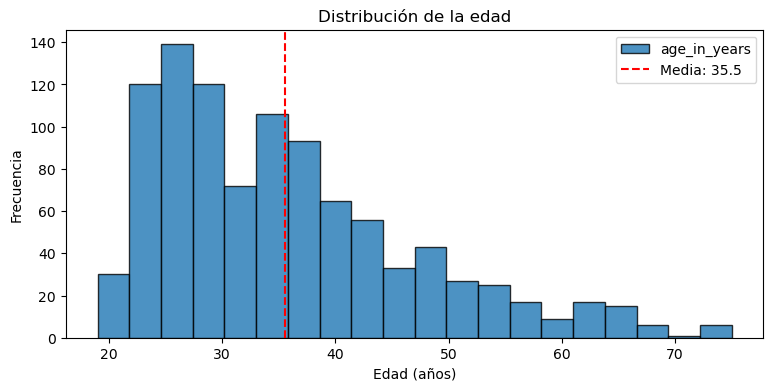

{'columna': 'age_in_years', 'min': 19.0, 'max': 75.0, 'mean': 35.542, 'count': 1000}


In [152]:
# Gráfico: distribución de la edad
# Soporta tanto 'age_in_years' (renombrado) como 'alter' (original)
age_col = 'age_in_years'
assert age_col is not None, "No se encuentra la columna de edad ('age_in_years' o 'alter'). Ejecuta las celdas previas."

plt.figure(figsize=(9, 4))
ax = df[age_col].plot(kind='hist', bins=20, edgecolor='black', alpha=0.8)
plt.title('Distribución de la edad')
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')

# Métricas básicas
age_min = df[age_col].min()
age_max = df[age_col].max()
age_mean = df[age_col].mean()
plt.axvline(age_mean, color='red', linestyle='--', linewidth=1.5, label=f"Media: {age_mean:.1f}")
plt.legend()
plt.show()

print({
    'columna': age_col,
    'min': float(age_min),
    'max': float(age_max),
    'mean': float(age_mean),
    'count': int(df[age_col].count()),
})


In [153]:

# Split 50% train, 25% val, 25% test
RANDOM_STATE = 200

# 50% train
train_df = df.sample(frac=0.5, random_state=RANDOM_STATE)
rest_df = df.drop(train_df.index)


# repartir el 50% restante en dos mitades iguales
val_df = rest_df.sample(frac=0.5, random_state=RANDOM_STATE)
test_df = rest_df.drop(val_df.index)

X_mean = np.mean(train_df, axis=0)
X_std = np.std(train_df, axis=0)
X_norm = (train_df - X_mean) / X_std
X_norm

# verificación rápida
print(f"Total: {len(df)}")
print(f"Train: {len(train_df)} ({len(train_df)/len(df):.1%})")
print(f"Val:   {len(val_df)} ({len(val_df)/len(df):.1%})")
print(f"Test:  {len(test_df)} ({len(test_df)/len(df):.1%})")

Total: 1000
Train: 500 (50.0%)
Val:   250 (25.0%)
Test:  250 (25.0%)


In [154]:
# Definir columna objetivo (corrige 'age_in_tears' -> 'age_in_years' si aplica)
target_col = 'age_in_years' if 'age_in_years' in train_df.columns else 'age_in_tears'

# Input: todas las columnas excepto la objetivo; Output: solo la objetivo
feature_cols = [c for c in train_df.columns if c != target_col]

input = train_df[feature_cols].values
output = train_df[target_col].values


In [155]:
x_inflated = np.hstack((np.ones((input.shape[0],1)),input))
x_inflated

array([[ 1.,  2., 12., ...,  1.,  2.,  1.],
       [ 1.,  1., 30., ...,  2.,  2.,  1.],
       [ 1.,  2., 20., ...,  2.,  2.,  1.],
       ...,
       [ 1.,  1., 24., ...,  1.,  2.,  0.],
       [ 1.,  2., 60., ...,  1.,  2.,  0.],
       [ 1.,  4., 15., ...,  1.,  2.,  1.]])

In [156]:
records = x_inflated.shape[0]
features = x_inflated.shape[1]
random.seed(42)
theta = np.random.rand(features,1)
theta[1:]


array([[0.34274135],
       [0.27695564],
       [0.59968183],
       [0.926039  ],
       [0.76153815],
       [0.61796504],
       [0.52254743],
       [0.98058865],
       [0.64869788],
       [0.37946887],
       [0.3123321 ],
       [0.44907525],
       [0.96028907],
       [0.86617619],
       [0.57285433],
       [0.81984658],
       [0.73950324],
       [0.56499611],
       [0.73609753],
       [0.93186969]])

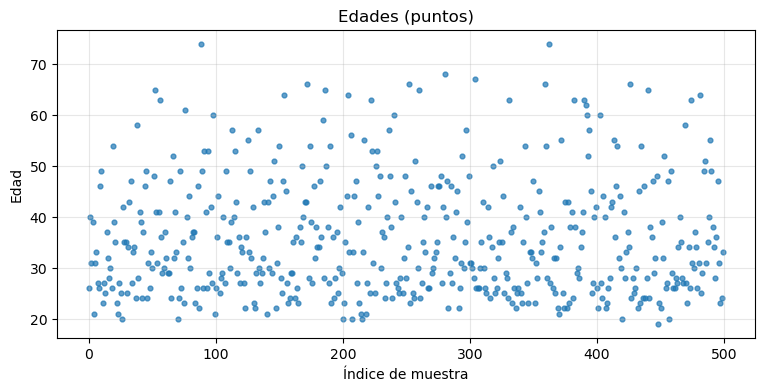

In [157]:
edades = np.ravel(output)

plt.figure(figsize=(9,4))
plt.scatter(np.arange(edades.size), edades, s=12, alpha=0.7)
plt.xlabel('Índice de muestra')
plt.ylabel('Edad')
plt.title('Edades (puntos)')
plt.grid(alpha=0.3)
plt.show()

In [158]:
def cost_function(x, y, theta, reg=None, lam=0.0):
    """
    Costo con opción de regularización.
    - reg: None | 'l1' | 'l2'
    - lam: fuerza de regularización (lambda)
    Retorna: (rmse_reg, ultimo_y_est)
    """

    n = x.shape[0]

    # Predicción y residuales
    y_est = x.dot(theta)
    resid = y_est - y

    # RMSE base
    rmse = np.sqrt(1/n*(np.sum(np.power(resid, 2))))

    # Penalización (excluye sesgo)
    reg_term = 0.0
    reg_slice = theta[1:]
    if reg == 'l2':
        l2 = float(np.sum(reg_slice**2))
        reg_term = (lam / (2.0 * n)) * l2
    elif reg == 'l1':
        l1 = float(np.sum(np.abs(reg_slice)))
        reg_term = (lam / (2.0 * n)) * l1

    return rmse + reg_term, y_est[-1]
    

In [159]:
def fit_model(x, y, theta, alpha=0.02, reg=None, lam=0.0, steps=100):
    cost_history = []
    y_est_history = []
    for step in range(steps):
        # ∇J(θ) = (1/n) * Xᵀ (Xθ - y)
        gradient = (1/len(y)) * (x.T @ (x @ theta - y))
        theta = theta - alpha * gradient
        cost, y_est = cost_function(x, y, theta)
        cost_history.append(cost)
        y_est_history.append(y_est)
    return cost_history, y_est_history,



In [160]:

cost_history, y_est_history = fit_model(x_inflated, output, theta, alpha=0.0000001, reg='l2', lam=0.0000002, steps=1000)


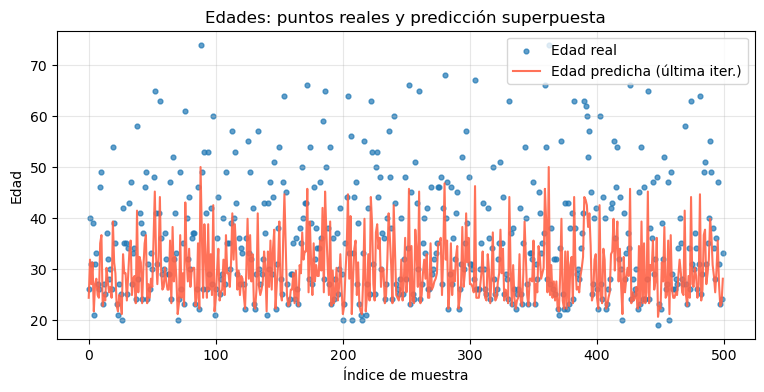

In [161]:
edades = np.ravel(output)
idx = np.arange(edades.size)

plt.figure(figsize=(9,4))
plt.scatter(idx, edades, s=12, alpha=0.7, label='Edad real')

# y_est_history: usa el último elemento si es vector del mismo largo
y_est_last = np.asarray(y_est_history[-1])
y_est_last = y_est_last.ravel() if y_est_last.ndim > 1 or y_est_last.shape != () else y_est_last

if isinstance(y_est_last, np.ndarray) and y_est_last.shape[0] == edades.shape[0]:
    plt.plot(idx, y_est_last, color='tomato', lw=1.5, alpha=0.9, label='Edad predicha (última iter.)')
else:
    # Fallback: si y_est_history no tiene vectores, calcula predicción actual
    try:
        y_pred = np.ravel(x_inflated @ theta)
        plt.plot(idx, y_pred, color='tomato', lw=1.5, alpha=0.9, label='Edad predicha (actual)')
    except Exception:
        pass

plt.xlabel('Índice de muestra')
plt.ylabel('Edad')
plt.title('Edades: puntos reales y predicción superpuesta')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [162]:
cost_history, y_est_history = fit_model(x_inflated, output, theta, alpha=0.0000001, reg='l1', lam=0.0000002, steps=1000)


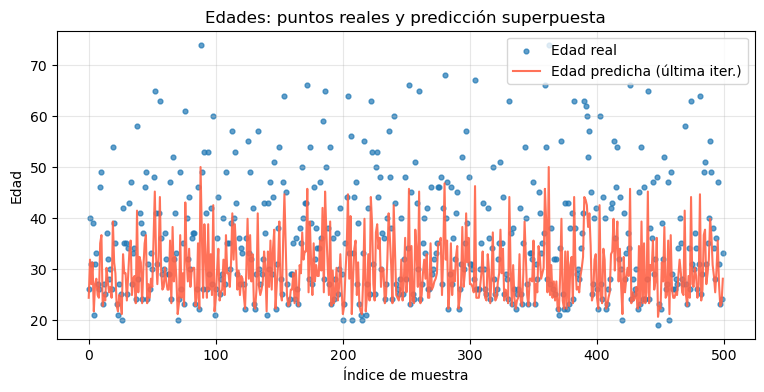

In [163]:
edades = np.ravel(output)
idx = np.arange(edades.size)

plt.figure(figsize=(9,4))
plt.scatter(idx, edades, s=12, alpha=0.7, label='Edad real')

# y_est_history: usa el último elemento si es vector del mismo largo
y_est_last = np.asarray(y_est_history[-1])
y_est_last = y_est_last.ravel() if y_est_last.ndim > 1 or y_est_last.shape != () else y_est_last

if isinstance(y_est_last, np.ndarray) and y_est_last.shape[0] == edades.shape[0]:
    plt.plot(idx, y_est_last, color='tomato', lw=1.5, alpha=0.9, label='Edad predicha (última iter.)')
else:
    # Fallback: si y_est_history no tiene vectores, calcula predicción actual
    try:
        y_pred = np.ravel(x_inflated @ theta)
        plt.plot(idx, y_pred, color='tomato', lw=1.5, alpha=0.9, label='Edad predicha (actual)')
    except Exception:
        pass

plt.xlabel('Índice de muestra')
plt.ylabel('Edad')
plt.title('Edades: puntos reales y predicción superpuesta')
plt.legend()
plt.grid(alpha=0.3)
plt.show()